In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [5]:
nltk.download('stopwords') # Downloading a collection of words from nltk lbrary

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mnkp9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
df = pd.read_csv("spam.csv", encoding='latin-1') # Loading the file

In [8]:
df.head() # Shows first 5 rows of the dataframe

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.info() # Summarizes the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# Drop unnecessary columns
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
# Rename columns for better readability
new_column_names = {"v1": "Category", "v2": "Message"}
df.rename(columns=new_column_names, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
# Replace null values with empty strings
data = df.where(pd.notnull(df), '')

In [14]:
data.shape  # Display the shape of the dataframe

(5572, 2)

In [15]:
data.head(10) # Display the first 10 rows of the dataframe

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [16]:
data.describe() # Display descriptive statistics of the dataframe

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [17]:
# Convert categorical labels to numerical values
data.loc[data["Category"] == 'spam', "Category"] = 0
data.loc[data["Category"] == 'ham', "Category"] = 1

# Define features (x) and target (y)
x = data["Message"]
y = data["Category"]

In [18]:
print(x)  # Display features

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [19]:
print(y)  # Display target

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [20]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [21]:
# Display the shapes of the training and testing sets
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


In [22]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(4457,)
(1115,)


In [23]:
# Create a TfidfVectorizer for feature extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [24]:
# Extract features from training and testing data
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [25]:
# Convert target variables to integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [26]:
x_train # Display training data and extracted features

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object

In [27]:
print(x_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

In [28]:
# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(x_train_features, y_train)

LogisticRegression()

In [29]:
# Make predictions on the training data
prediction_on_training_data = model.predict(x_train_features)

# Calculate accuracy on the training data
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
print("Accuracy on training data: ", accuracy_on_training_data)

Accuracy on training data:  0.9661207089970832


In [30]:
# Make predictions on the testing data
prediction_on_test_data = model.predict(x_test_features)

# Calculate accuracy on the testing data
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
print("Accuracy on test data: ", accuracy_on_test_data)

Accuracy on test data:  0.9623318385650225


In [31]:
# Input the message for prediction
input_your_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)

# Print the prediction result
if(prediction[0] == 1):
  print("Ham mail")
else:
  print("Spam mail")

[1]
Ham mail


In [32]:
# Input the message for prediction
input_your_mail = ["Congratualtions! You have been approved 5000 Loan"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)

# Print the prediction result
if(prediction[0] == 1):
  print("Ham mail")
else:
  print("Spam mail")

[1]
Ham mail


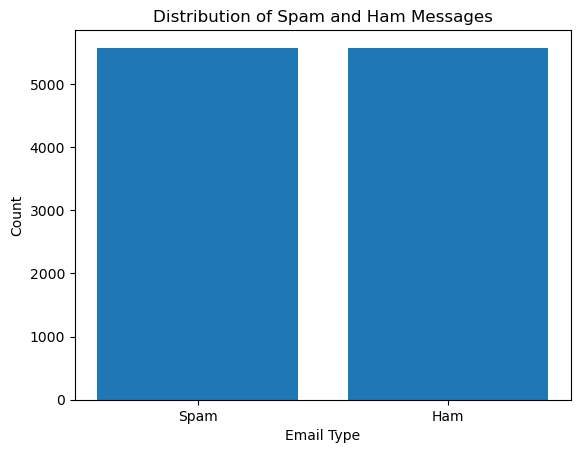

In [33]:
# Visualize the distribution of spam and ham messages
spam_count = (data["Category"] == 0).shape[0]
ham_count = (data["Category"] == 1).shape[0]

plt.bar(["Spam", "Ham"], [spam_count, ham_count])
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.title("Distribution of Spam and Ham Messages")
plt.show()

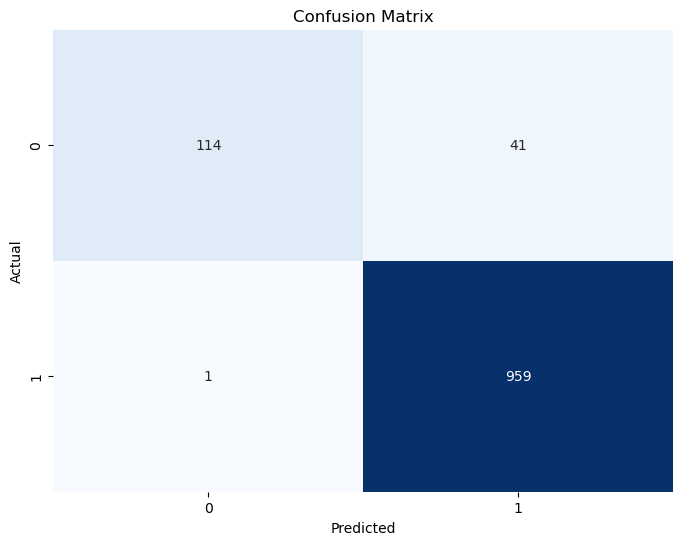

In [34]:
# Create a confusion matrix
cm = confusion_matrix(y_test, prediction_on_test_data)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

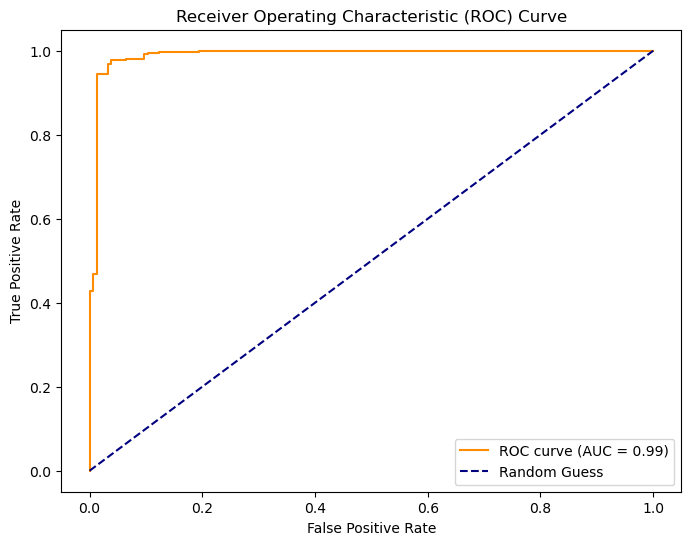

In [35]:
# Plot the ROC curve
probabilities = model.predict_proba(x_test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = roc_auc_score(y_test, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', label = "Random Guess", linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

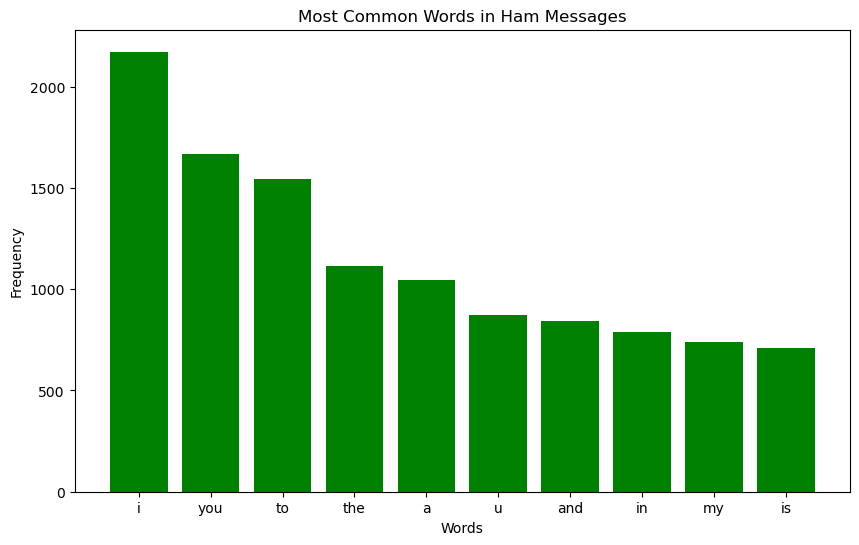

In [36]:
# Visualize the most common words in ham messages
ham_word_freq = Counter([word.lower() for message in data[data['Category'] == 1]['Message'] for word in message.split()])
plt.figure(figsize=(10, 6))
plt.bar(*zip(*ham_word_freq.most_common(10)), color = "green")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Ham Messages')
plt.show()

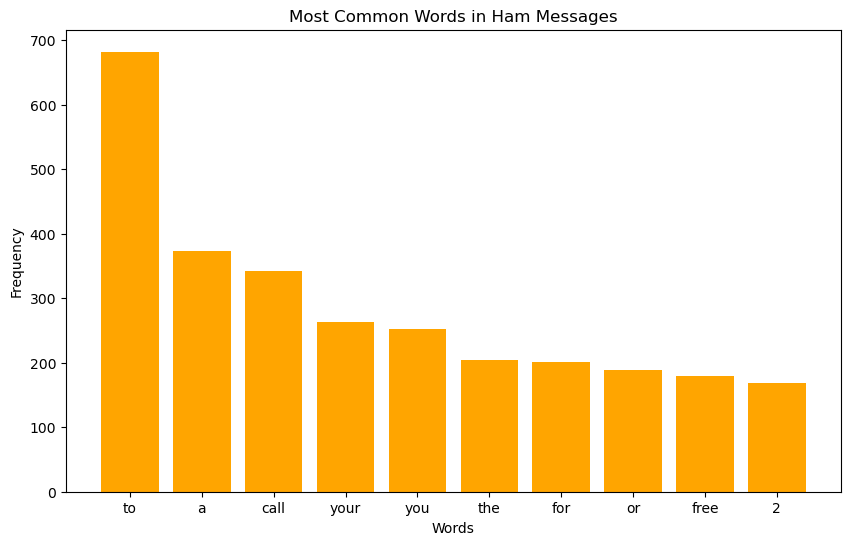

In [38]:
# Visualize the most common words in spam messages
spam_word_freq = Counter([word.lower() for message in data[data['Category'] == 0]['Message'] for word in message.split()])
plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(10)), color = "orange")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Ham Messages')
plt.show()